# Creating an interactive notebook to replicate RNA-seq Analysis


## Setting up the necessary packages.  Here we are using biocLite to install two new packages that we haven't seen in class.  BiocLite is a part of Bioconductor that helps with installations. The main packages of interest that are downloaded are Limma, Glimma, Mus.musculus, and edgeR.

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite()
biocLite("limma")
library(limma)
source("https://bioconductor.org/biocLite.R")
biocLite(c("Glimma", "Mus.musculus"))

biocLite("RColorBrewer")
biocLite("gplots")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Old packages: 'curl', 'foreign', 'Matrix', 'nlme', 'pillar', 'repr', 'survival'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Installing package(s) ‘limma’



The downloaded binary packages are in
	/var/folders/ft/2m0tq68d18q306dh27q6bgq00000gn/T//Rtmp3WZcZ8/downloaded_packages


Old packages: 'curl', 'foreign', 'Matrix', 'nlme', 'pillar', 'repr', 'survival'
Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Installing package(s) ‘Glimma’, ‘Mus.musculus’



The downloaded binary packages are in
	/var/folders/ft/2m0tq68d18q306dh27q6bgq00000gn/T//Rtmp3WZcZ8/downloaded_packages


installing the source package ‘Mus.musculus’

Old packages: 'curl', 'foreign', 'Matrix', 'nlme', 'pillar', 'repr', 'survival'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Installing package(s) ‘RColorBrewer’



The downloaded binary packages are in
	/var/folders/ft/2m0tq68d18q306dh27q6bgq00000gn/T//Rtmp3WZcZ8/downloaded_packages


Old packages: 'curl', 'foreign', 'Matrix', 'nlme', 'pillar', 'repr', 'survival'
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Installing package(s) ‘gplots’



The downloaded binary packages are in
	/var/folders/ft/2m0tq68d18q306dh27q6bgq00000gn/T//Rtmp3WZcZ8/downloaded_packages


Old packages: 'curl', 'foreign', 'Matrix', 'nlme', 'pillar', 'repr', 'survival'


In [2]:
library(Glimma)
library(edgeR)
library(Mus.musculus)


Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following object is masked from ‘package:limma’:

    plotMA

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, 

In [3]:
biocLite("R.utils")

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Installing package(s) ‘R.utils’



The downloaded binary packages are in
	/var/folders/ft/2m0tq68d18q306dh27q6bgq00000gn/T//Rtmp3WZcZ8/downloaded_packages


Old packages: 'curl', 'foreign', 'Matrix', 'nlme', 'pillar', 'repr', 'survival'


### Using the R.utils package we are able to download and decompress a file.  This specific file contains 9 different text files that contain gene level counts from 9 different samples.  These counts are used to find cells that are not only expressed in low/high levels, but also to see which genes are differentially expressed. 

### The files object in R has the 9 different files that we are using hardcoded and combined into a list for extracting information.

In [5]:

data_source_url <- "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE63310&format=file"
utils::download.file(data_source_url, destfile="GSE63310_RAW.tar", mode="wb") 
utils::untar("GSE63310_RAW.tar", exdir = ".")

files <- c("GSM1545535_10_6_5_11.txt", "GSM1545536_9_6_5_11.txt", "GSM1545538_purep53.txt",
  "GSM1545539_JMS8-2.txt", "GSM1545540_JMS8-3.txt", "GSM1545541_JMS8-4.txt",
  "GSM1545542_JMS8-5.txt", "GSM1545544_JMS9-P7c.txt", "GSM1545545_JMS9-P8c.txt")

for(i in paste(files, ".gz", sep=""))
  R.utils::gunzip(i, overwrite=TRUE)

In [6]:
files <- c("GSM1545535_10_6_5_11.txt", "GSM1545536_9_6_5_11.txt", 
   "GSM1545538_purep53.txt", "GSM1545539_JMS8-2.txt", 
   "GSM1545540_JMS8-3.txt", "GSM1545541_JMS8-4.txt", 
   "GSM1545542_JMS8-5.txt", "GSM1545544_JMS9-P7c.txt", 
   "GSM1545545_JMS9-P8c.txt")

read.delim(files[1], nrow=5)

EntrezID,GeneLength,Count
497097,3634,1
100503874,3259,0
100038431,1634,0
19888,9747,0
20671,3130,1


## EntrezID is the unique identifier for a gene that resides in the NCBI's database for gene-specific information.

## GeneLength is the size of the gene is the size of the gene and Count is the amount of occurrences of that gene in the specific sample.

## readDGE produces two different data frames.  There is the samples table which has information for each file that was used, a counts table which has the count of each gene from each file, and a gene table which stores gene information associated with the rows from the counts matrix.

## What is nice about the readDGE function is that you can pass in a list of files and it will combine all of the data for you in a nice representation.  This can be done as well but just combining columns of data from each sample manually but here you don't need to do that.

## x is a DGElist-object that holds the two dataframes Samples and Counts.  The samples is a dataframe that is composed of the file name, the experiment identifier, the size of the library (total number of mapped reads) of the experiment, the experiment batch (lane) and the normalized factor for each sample.

In [7]:
x <- readDGE(files, columns=c(1,3)) 
class(x) ## Get the type of object returned by readDGE
dim(x) ## Get the dimenstions of the new dataframe

[1] "DGEList"
attr(,"package")
[1] "edgeR"

[1] 27179     9

In [59]:
x
dim(x$counts)

An object of class "DGEList"
$samples
                             files group lib.size norm.factors lane
10_6_5_11 GSM1545535_10_6_5_11.txt    LP 32832881    0.8957309 L004
9_6_5_11   GSM1545536_9_6_5_11.txt    ML 35296067    1.0349196 L004
purep53     GSM1545538_purep53.txt Basal 57089259    1.0439552 L004
JMS8-2       GSM1545539_JMS8-2.txt Basal 51304051    1.0405040 L006
JMS8-3       GSM1545540_JMS8-3.txt    ML 75724862    1.0323599 L006
JMS8-4       GSM1545541_JMS8-4.txt    LP 60457787    0.9223424 L006
JMS8-5       GSM1545542_JMS8-5.txt Basal 55014064    0.9836603 L006
JMS9-P7c   GSM1545544_JMS9-P7c.txt    ML 21282257    1.0827381 L008
JMS9-P8c   GSM1545545_JMS9-P8c.txt    LP 19938942    0.9792607 L008

$counts
        Samples
Tags     10_6_5_11 9_6_5_11 purep53 JMS8-2 JMS8-3 JMS8-4 JMS8-5 JMS9-P7c
  497097         1        2     342    526      3      3    535        2
  27395        431      771    1368   1268   1564    769    818      468
  18777        768     1722    2517   1923   3865   1888   1830     1246
  21399        810      977    2472   1870   2251   1716   1932      756
  58175        452      358      17     14    622    571     12      203
        Samples
Tags     JMS9-P8c
  497097        0
  27395       342
  18777       693
  21399       619
  58175       224
14160 more rows ...

$genes
   ENTREZID SYMBOL TXCHROM
1    497097   Xkr4    chr1
6     27395 Mrpl15    chr1
7     18777 Lypla1    chr1
9     21399  Tcea1    chr1
10    58175  Rgs20    chr1
14160 more rows ...

[1] 14165     9

In [111]:
x$genes
dim(x$genes)

NULL

NULL

### x is a DGElist-object that holds two dataframes called samples and counts.  The samples

### Here we are hardcoding the type of cells (Basal, Luminal Progenitor, Mature Luminal) and harcoding them as well as the specific batch type to each of the 9 different sample files. The Lane is the batch type.

In [9]:
samplenames <- substring(colnames(x), 12, nchar(colnames(x)))
samplenames

colnames(x) <- samplenames
group <- as.factor(c("LP", "ML", "Basal", "Basal", "ML", "LP", "Basal", "ML", "LP"))

x$samples$group <- group
lane <- as.factor(rep(c("L004","L006","L008"), c(3,4,2)))
x$samples$lane <- lane
x$samples

[1] "10_6_5_11" "9_6_5_11"  "purep53"   "JMS8-2"    "JMS8-3"    "JMS8-4"   
[7] "JMS8-5"    "JMS9-P7c"  "JMS9-P8c"

,files,group,lib.size,norm.factors,lane
10_6_5_11,GSM1545535_10_6_5_11.txt,LP,32863052,1,L004
9_6_5_11,GSM1545536_9_6_5_11.txt,ML,35335491,1,L004
purep53,GSM1545538_purep53.txt,Basal,57160817,1,L004
JMS8-2,GSM1545539_JMS8-2.txt,Basal,51368625,1,L006
JMS8-3,GSM1545540_JMS8-3.txt,ML,75795034,1,L006
JMS8-4,GSM1545541_JMS8-4.txt,LP,60517657,1,L006
JMS8-5,GSM1545542_JMS8-5.txt,Basal,55086324,1,L006
JMS9-P7c,GSM1545544_JMS9-P7c.txt,ML,21311068,1,L008
JMS9-P8c,GSM1545545_JMS9-P8c.txt,LP,19958838,1,L008


### Here we use the Mus.musculus package to get the gene annotation information which contains data like gene symbols and chromosome information.  There are many packages that use and the Mus.musculus happens to deal with genes associated with mice. 

In [10]:
geneid <- rownames(x)
genes <- select(Mus.musculus, keys=geneid, columns=c("SYMBOL", "TXCHROM"), 
                keytype="ENTREZID")
head(genes)

'select()' returned 1:many mapping between keys and columns


ENTREZID,SYMBOL,TXCHROM
497097,Xkr4,chr1
100503874,Gm19938,NA
100038431,Gm10568,NA
19888,Rp1,chr1
20671,Sox17,chr1
27395,Mrpl15,chr1


### There is no guarantee in the database to that each of the EntrezIDs will map to just one specific chromosome so we remove the duplicates and just associate the Id with the first occurrence that it maps to.  (This could be a good way to extend the workflow by going about this in another way).

In [48]:
#genes
id.list <- genes[, 1]
id.list[1]
typeof(genes[,1])


[1] "497097"

[1] "character"

In [62]:

genes <- genes[!duplicated(genes$ENTREZID),] # remove duplicated keeping on first occurrence of a gene
x$genes <- genes # set new genes as the dataset with duplicates filtered
#x
#dim(x$genes)

# DATA PRE-PROCESSING

### The cpm stand for counts per million but we used another way to expressing this same thing in class which was by denoting that value as RPKM which stands for reads per kilobase per million.  This metric is used to measure gene expression from RNA sequencing data by normalizing for the total read length and the number of sequencing reads.

In [12]:
cpm <- cpm(x)
lcpm <- cpm(x, log=TRUE)

## Removing genes that are lowly expressed

### Here we remove any genes that are lowely expressed which are any genes that don't have 

In [13]:
table(rowSums(x$counts==0)==9)


keep.exprs <- rowSums(cpm>1)>=3
x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)



FALSE  TRUE 
22026  5153 

[1] 14165     9

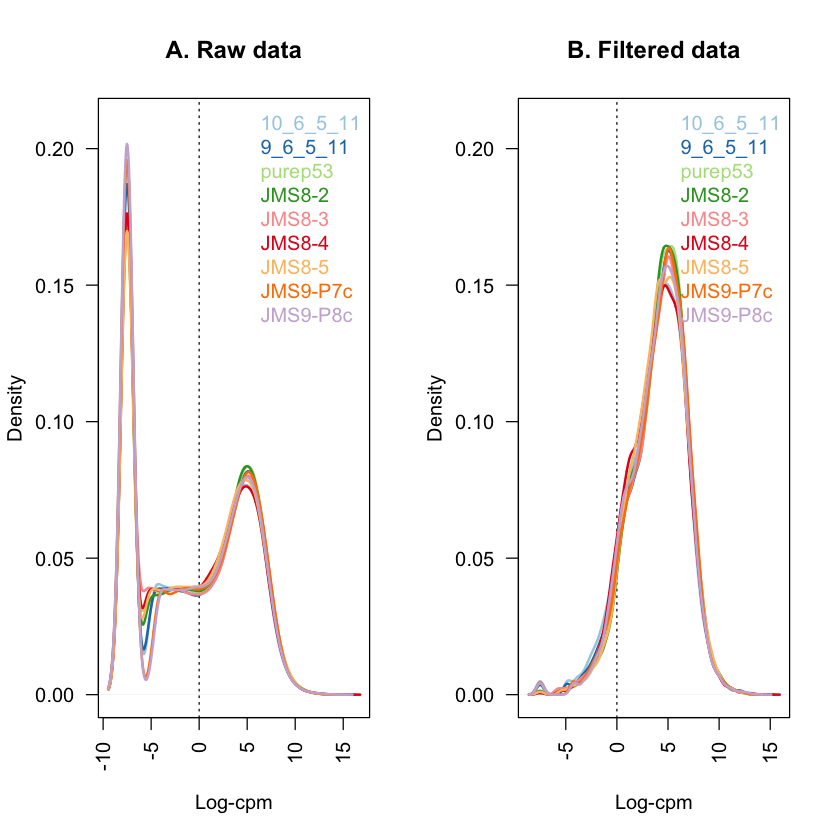

In [14]:

library(RColorBrewer)
nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")
par(mfrow=c(1,2))
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(lcpm[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(lcpm[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

# Normalising Gene Expression Distributions

### Here we normalize the data  to remove systematic variation in a microarray experiment which affects the measured gene expression levels.  This is done with the TMM (trimmed mean of m-values) which is a function provided by edgeR.  

### This means that an individual reference gene is tested against the other reference genes in a pairwise variation that serially excludes the least stable genes from the analysis. The most stable reference genes exhibit the lowest M-values. (https://www.researchgate.net/figure/Average-expression-stability-M-value-of-the-reference-genes-determined-by-GeNorm_fig2_258248304)


In [15]:
x <- calcNormFactors(x, method = "TMM")
x$samples$norm.factors

[1] 0.8957309 1.0349196 1.0439552 1.0405040 1.0323599 0.9223424 0.9836603
[8] 1.0827381 0.9792607

In [16]:
x2 <- x
x2$samples$norm.factors <- 1
x2$counts[,1] <- ceiling(x2$counts[,1]*0.05)
x2$counts[,2] <- x2$counts[,2]*5

### The following code uses graphs to indicate the power of normalizing data.  In the above code we see that the values in the two of the text files, samples 1 and 2, get their values reduced to 5% and 500% of their original values and then when in the code below the data gets normalized before plotting it ther discrepancy between those two values is very blatant.

[1] 0.05472223 6.13059440 1.22927355 1.17051887 1.21487709 1.05622968 1.14587663
[8] 1.26129350 1.11702264

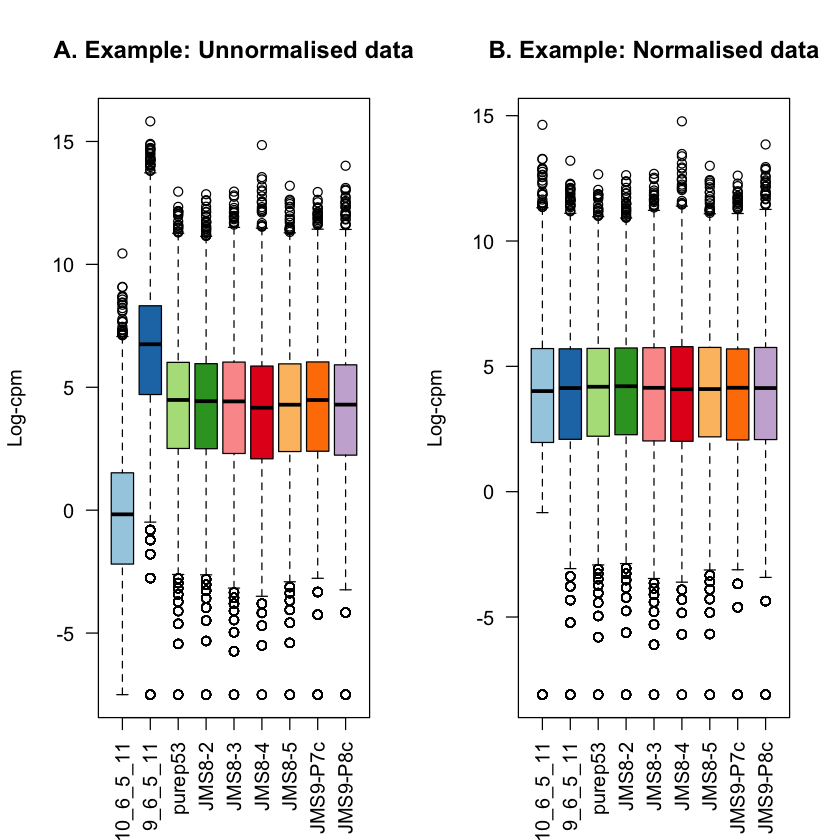

In [17]:
par(mfrow=c(1,2))
lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="A. Example: Unnormalised data",ylab="Log-cpm")
x2 <- calcNormFactors(x2)  
x2$samples$norm.factors

lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="B. Example: Normalised data",ylab="Log-cpm")

# Unsurpervised Clustering of Samples

### Example of curse of dimensionality.  

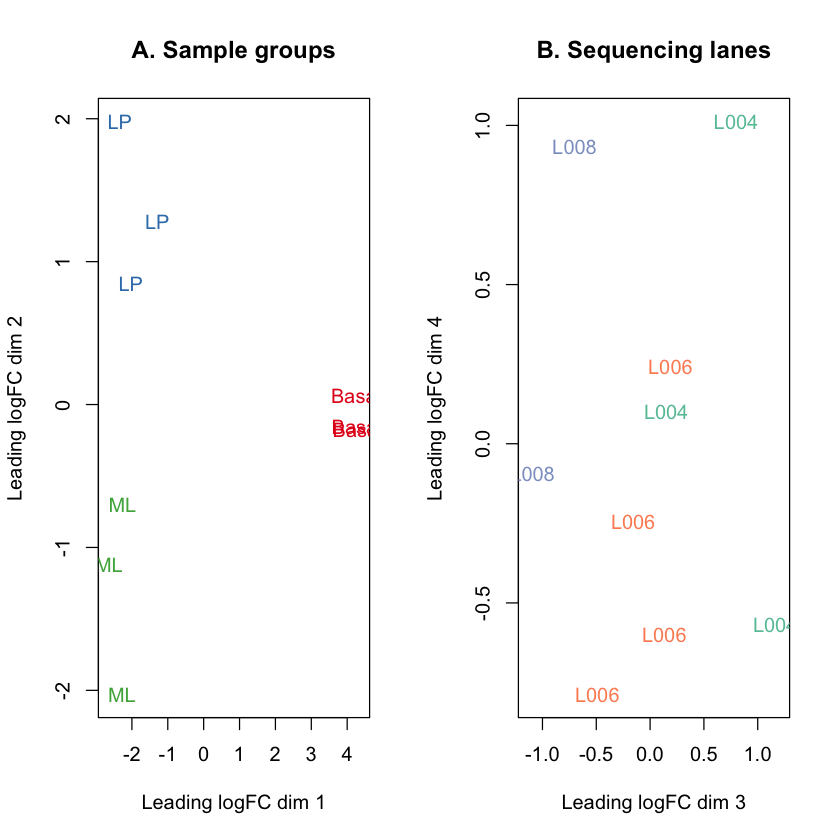

In [24]:
lcpm <- cpm(x, log=TRUE)
par(mfrow=c(1,2))
col.group <- group
levels(col.group) <-  brewer.pal(nlevels(col.group), "Set1")
col.group <- as.character(col.group)
col.lane <- lane
levels(col.lane) <-  brewer.pal(nlevels(col.lane), "Set2")
col.lane <- as.character(col.lane)
plotMDS(lcpm, labels=group, col=col.group)
title(main="A. Sample groups")
plotMDS(lcpm, labels=lane, col=col.lane, dim=c(3,4))
title(main="B. Sequencing lanes")


In [26]:
design <- model.matrix(~0+group+lane)
colnames(design) <- gsub("group", "", colnames(design))
design

## ----contrasts-----------------------------------------------------------
contr.matrix <- makeContrasts(
   BasalvsLP = Basal-LP, 
   BasalvsML = Basal - ML, 
   LPvsML = LP - ML, 
   levels = colnames(design))
contr.matrix

,Basal,LP,ML,laneL006,laneL008
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,1,0
5,0,0,1,1,0
6,0,1,0,1,0
7,1,0,0,1,0
8,0,0,1,0,1
9,0,1,0,0,1


,BasalvsLP,BasalvsML,LPvsML
Basal,1,1,0
LP,-1,0,1
ML,0,-1,-1
laneL006,0,0,0
laneL008,0,0,0


In [ ]:
# Run this to use the Glimma package to create an interactive plot to look at many dimensions
#glMDSPlot(lcpm, labels=paste(group, lane, sep="_"), groups=x$samples[,c(2,5)], launch=FALSE)

# Differential Expression Analysis

## Creating a design matrix and contrasts

## Removing heteroscedascity (the measure of variability that a variable is unequal across a set of values of a second variable that predicts it) from count data.

### Probability distributions for counts are naturally heteroscedastic, with larger variances for larger counts. It has previously been argued that the mean-variance relationship for RNA-seq counts should be approximately quadratic [34]. This leads to the conclusion that the coefficient of variation (CV) of RNA-seq counts should be a decreasing function (https://genomebiology.biomedcentral.com/articles/10.1186/gb-2014-15-2-r29)

,ENTREZID,SYMBOL,TXCHROM
1,497097,Xkr4,chr1
6,27395,Mrpl15,chr1
7,18777,Lypla1,chr1
9,21399,Tcea1,chr1
10,58175,Rgs20,chr1
11,108664,Atp6v1h,chr1
14,12421,Rb1cc1,chr1
17,319263,Pcmtd1,chr1
19,59014,Rrs1,chr1
20,76187,Adhfe1,chr1


Warning message in title(...):
“conversion failure on 'Final model: Mean−variance trend' in 'mbcsToSbcs': dot substituted for <e2>”Warning message in title(...):
“conversion failure on 'Final model: Mean−variance trend' in 'mbcsToSbcs': dot substituted for <88>”Warning message in title(...):
“conversion failure on 'Final model: Mean−variance trend' in 'mbcsToSbcs': dot substituted for <92>”

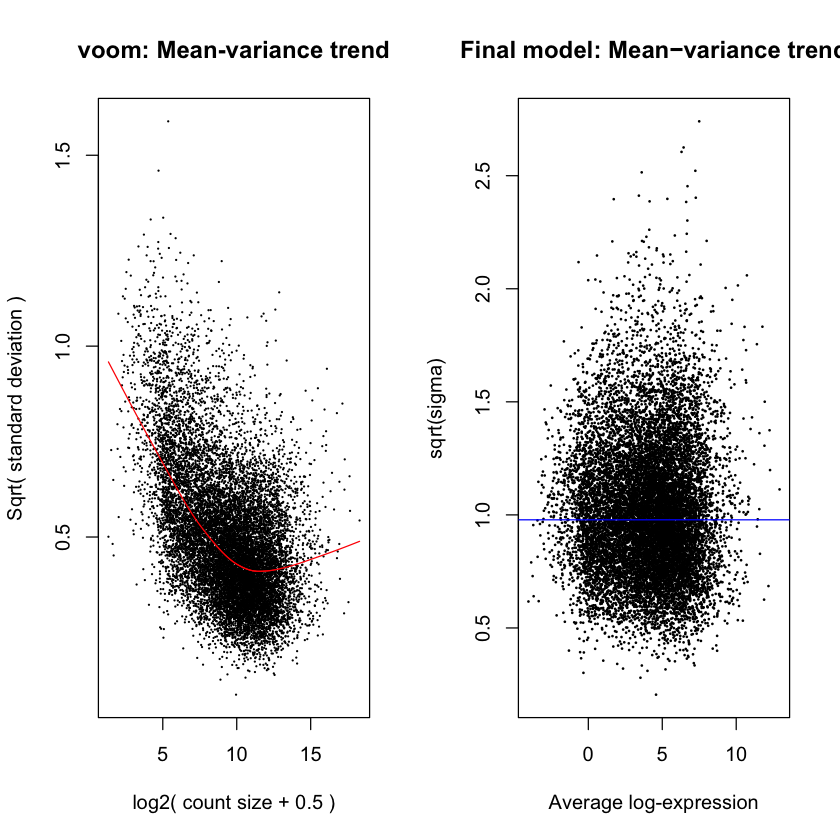

In [27]:
par(mfrow=c(1,2))
v <- voom(x, design, plot=TRUE)
v

vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model: Mean−variance trend")

## Examining the number of DE genes

In [49]:
summary(decideTests(efit))

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

In [51]:
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

       BasalvsLP BasalvsML LPvsML
Down        1417      1512    203
NotSig     11030     10895  13780
Up          1718      1758    182

[1] 2409

[1] "Xkr4"          "Rgs20"         "Cpa6"          "Sulf1"        
 [5] "Eya1"          "Msc"           "Sbspon"        "Pi15"         
 [9] "Crispld1"      "Kcnq5"         "Ptpn18"        "Arhgef4"      
[13] "2010300C02Rik" "Aff3"          "Npas2"         "Tbc1d8"       
[17] "Creg2"         "Il1r1"         "Il18r1"        "Il18rap"

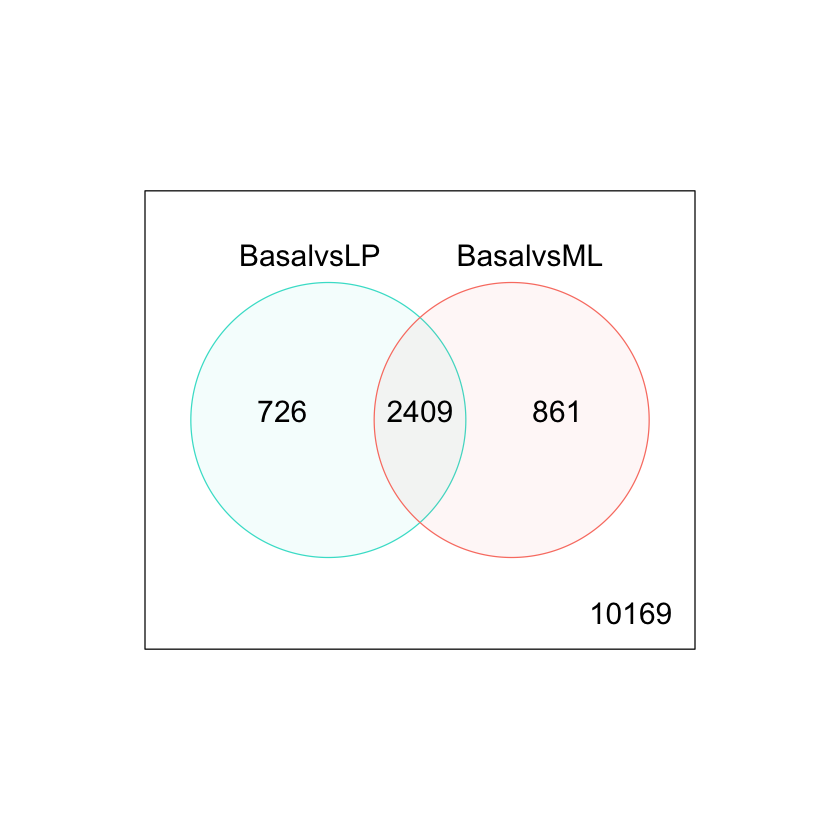

In [52]:
de.common <- which(dt[,1]!=0 & dt[,2]!=0)
length(de.common)

head(tfit$genes$SYMBOL[de.common], n=20)

vennDiagram(dt[,1:2], circle.col=c("turquoise", "salmon"))

## Comparing the number of DE genes based on threshold

In [53]:
five <- summary(decideTests(efit))
five

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

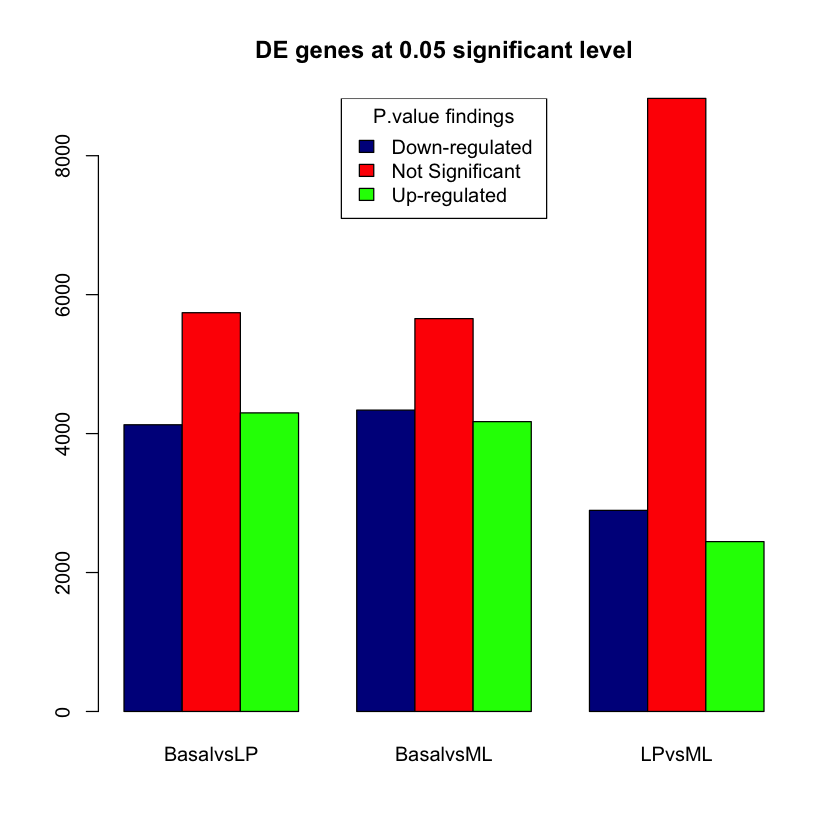

In [54]:
barplot(five, beside=TRUE, col=c("darkblue", "red", "green"),main = "DE genes at 0.05 significant level")

legend("top", inset=c(-0.2,0), 
       legend = c("Down-regulated", "Not Significant", "Up-regulated"), title="P.value findings",
       fill = c("darkblue", "red", "green"))

In [55]:
one <- summary(decideTests(efit), p.value=0.01)
one

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

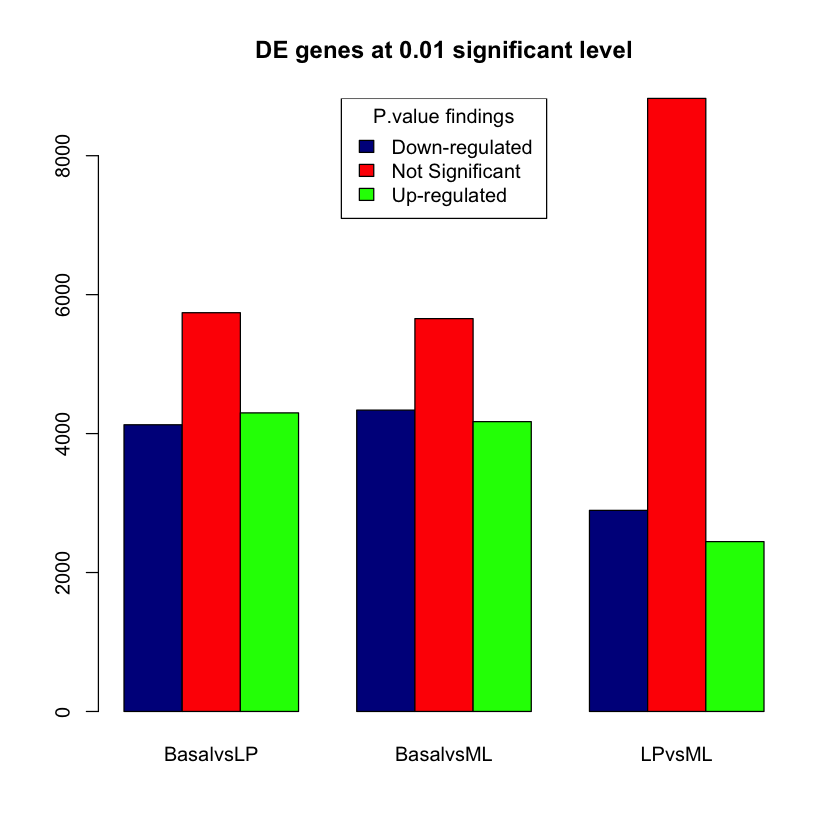

In [56]:
barplot(one, beside=TRUE, col=c("darkblue", "red", "green"),main = "DE genes at 0.01 significant level")

legend("top", inset=c(-0.2,0), 
       legend = c("Down-regulated", "Not Significant", "Up-regulated"), title="P.value findings",
       fill = c("darkblue", "red", "green"))

In [57]:
ptone <- one <- summary(decideTests(efit), p.value=0.001)
ptone

       BasalvsLP BasalvsML LPvsML
Down        4127      4338   2895
NotSig      5740      5655   8825
Up          4298      4172   2445

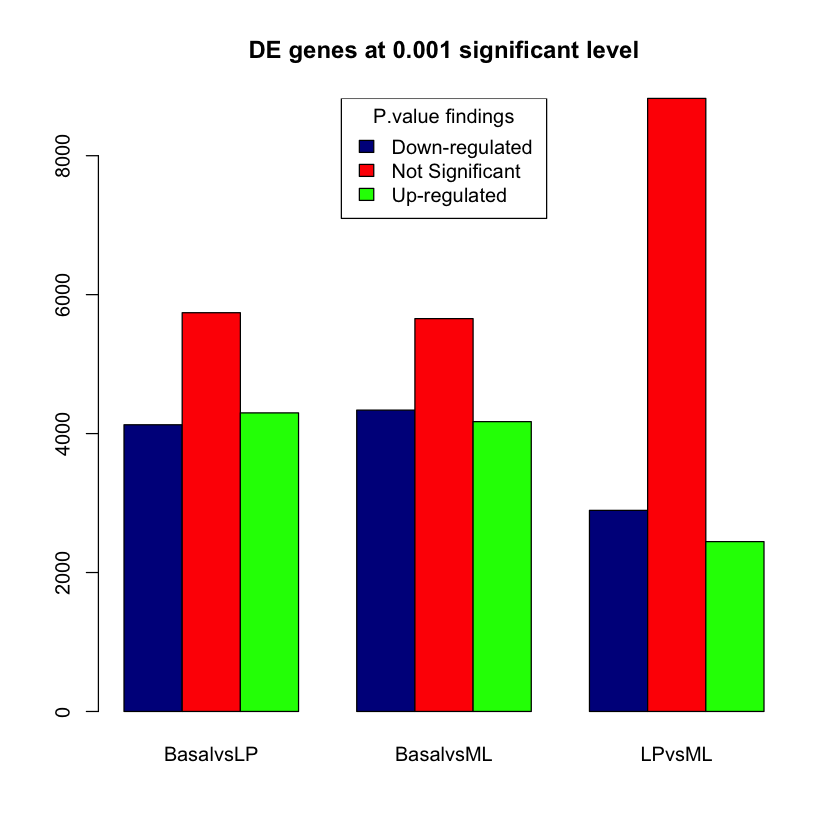

In [58]:
barplot(ptone, beside=TRUE, col=c("darkblue", "red", "green"), main = "DE genes at 0.001 significant level")

legend("top", inset=c(-0.2,0), 
       legend = c("Down-regulated", "Not Significant", "Up-regulated"), title="P.value findings",
       fill = c("darkblue", "red", "green"))

## Examining individual DE genes from top to bottom

In [60]:
basal.vs.lp <- topTreat(tfit, coef=1, n=Inf)
basal.vs.ml <- topTreat(tfit, coef=2, n=Inf)

head(basal.vs.lp)
head(basal.vs.ml)


,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val
12759,12759,Clu,chr14,-5.442877,8.857907,-33.44429,3.990899e-10,2.703871e-06
53624,53624,Cldn7,chr11,-5.514605,6.296762,-32.94533,4.503694e-10,2.703871e-06
242505,242505,Rasef,chr4,-5.921741,5.119585,-31.77625,6.063249e-10,2.703871e-06
67451,67451,Pkp2,chr16,-5.724823,4.420495,-30.65370,8.010456e-10,2.703871e-06
228543,228543,Rhov,chr2,-6.253427,5.486640,-29.46244,1.112729e-09,2.703871e-06
70350,70350,Basp1,chr15,-6.073297,5.248349,-28.64890,1.380545e-09,2.703871e-06


,ENTREZID,SYMBOL,TXCHROM,logFC,AveExpr,t,P.Value,adj.P.Val
242505,242505,Rasef,chr4,-6.510470,5.119585,-35.49093,2.573575e-10,1.915485e-06
53624,53624,Cldn7,chr11,-5.469160,6.296762,-32.52520,4.978446e-10,1.915485e-06
12521,12521,Cd82,chr2,-4.667737,7.070963,-31.82187,5.796191e-10,1.915485e-06
71740,71740,Nectin4,chr1,-5.556046,5.166292,-31.29987,6.760578e-10,1.915485e-06
20661,20661,Sort1,chr3,-4.908119,6.705784,-31.23083,6.761331e-10,1.915485e-06
15375,15375,Foxa1,chr12,-5.753884,5.625064,-28.34612,1.487280e-09,2.281914e-06


## Graphical representations of differential expression results

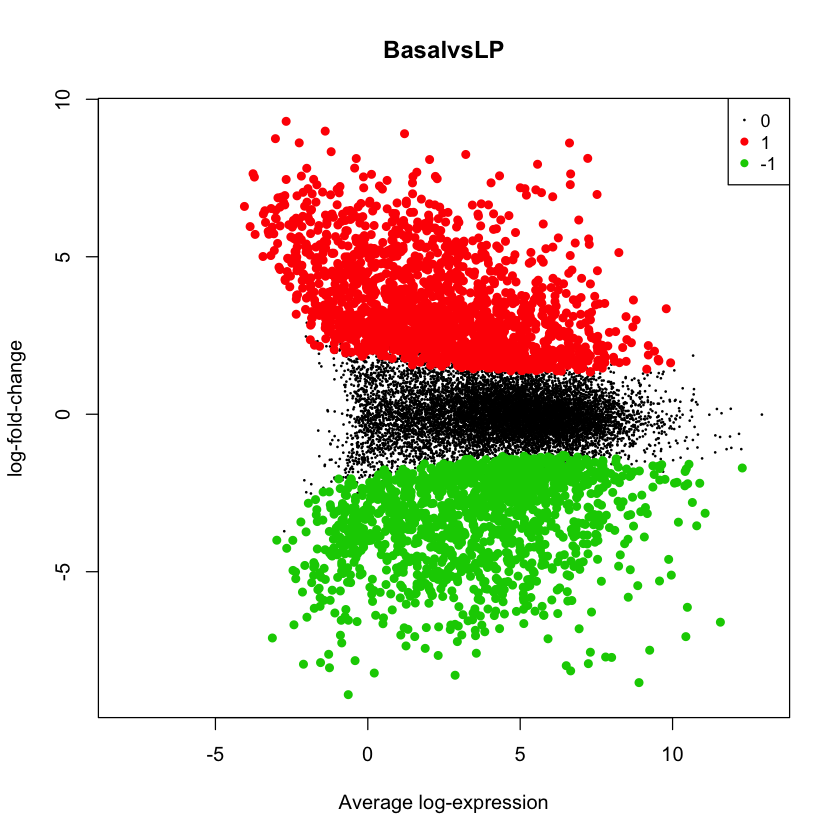

In [61]:
plotMD(tfit, column=1, status=dt[,1], main=colnames(tfit)[1], 
       xlim=c(-8,13))

In [ ]:

library(gplots)
basal.vs.lp.topgenes <- basal.vs.lp$ENTREZID[1:100]
i <- which(v$genes$ENTREZID %in% basal.vs.lp.topgenes)
mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,], scale="row",
   labRow=v$genes$SYMBOL[i], labCol=group, 
   col=mycol, trace="none", density.info="none", 
   margin=c(8,6), lhei=c(2,10), dendrogram="column")

## Gene set testing with camera

In [ ]:
load("mouse_c2_v5p1.rda")
idx <- ids2indices(Mm.c2,id=rownames(v))
cam.BasalvsLP <- camera(v,idx,design,contrast=contr.matrix[,1])
head(cam.BasalvsLP,5)

Barcode plot of LIM_MAMMARY_LUMINAL_MATURE_UP (red bars, top of plot) and LIM_MAMMARY_LUMINAL_MATURE_DN (blue bars, bottom of plot) gene sets in the LP versus ML contrast with an enrichment line for each set that shows the relative enrichment of the vertical bars in each part of the plot.

In [ ]:
barcodeplot(tfit$t[,3], index=idx$LIM_MAMMARY_LUMINAL_MATURE_UP, 
            index2=idx$LIM_MAMMARY_LUMINAL_MATURE_DN, main="LPvsML")

In [ ]:
res <- lfcShrink(dds, contrast=c("dex","trt","untrt"), res=res)
plotMA(res, ylim = c(-5, 5))